<a href="https://colab.research.google.com/github/Tsiemi-eude/projet_git/blob/main/Tri_Bafoussam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
  <img src="https://it-gnosis.eu/en/partners/keyce/cover-keyce.jpg" alt="Logo Université" width="180"/>
</center>



  <center>

# **Rapport de Projet : Algorithmique et Structures de Données**

---



---

# THEME: 🗑️ TRI ET ANALYSE DES POINTS DE COLLECTE DE DÉCHETS À BAFOUSSAM

### 👨‍🎓 Réalisé par :
 **Tsiemi Kengne Eude Divane**

 **Nanvou Ange Wilfried**

 **Kenlefack Guimgo Samuel**

 **Manfo Nzali Herman**

### 👨‍🏫 Encadrant : **M. GHOMSI**  
### 📚 Filière : **Bachelor 3 RSI & IA**  
### 📅 Année académique : **2024 – 2025**

---

> _« Un bon tri, c’est la base d’une ville propre et intelligente. »_

</center>

# 📑 Sommaire du projet

1. 🟢 **Introduction**  

2. 🏙️ **Contexte et justification**  

3. 🎯 **Objectifs du projet**

4. 📁 **Montage du Drive et définition du chemin**  
5. 📦 **Installation et import des bibliothèques**  
6. 🏙️ **Création et simulation des données**  
7. 💾 **Sauvegarde des données CSV**  
8. ⚙️ **Méthodologie et description des algorithmes**  
9. 💻 **Implémentation des algorithmes**  
10. ⏱️ **Comparaison des temps d'exécution**  
11. 📈 **Discussion et interprétation**  
12. 📊 **Top 10 quartiers par quantité de déchets**  
13. 🗺️ **Carte interactive**  
14. 🧾 **Mini-rapport automatique**  
15. 💡 **Recommandations pratiques**  
16. ⏰ **Analyse temporelle simplifiée**  
17. 🗑️ **Tableau interactif des quartiers triés par critère**  
18. 📚 **Références bibliographiques**


---

# 1️⃣ 🟢 Introduction

La gestion des déchets urbains représente un **enjeu majeur** pour les villes africaines, notamment **Bafoussam**, où la croissance démographique et le développement économique entraînent une forte production de déchets.

L’objectif de ce projet est d’utiliser différents **algorithmes de tri** pour organiser les points de collecte selon :  
- La quantité moyenne de déchets générés  
- La fréquence de passage des camions  
- La distance par rapport au centre-ville  

---

---

# 2️⃣ 🏙️ Contexte et justification

À Bafoussam, la collecte des déchets est un service essentiel mais coûteux.  
Les points de collecte présentent des caractéristiques variées : certains accumulent rapidement les déchets, d’autres sont peu remplis mais éloignés du centre-ville.

**Problèmes rencontrés :**  
- Trajets longs et énergivores  
- Surcharge de certains bacs  
- Ralentissement du service public  

**Solution proposée :**  
- Mise en place d’un **tri informatique intelligent** des points de collecte pour prioriser les interventions, réduire les coûts et améliorer la qualité de vie urbaine.

---

---

# 3️⃣ 🎯 Objectifs du projet

### Objectif général :
Mettre en œuvre et comparer plusieurs algorithmes de tri pour l’analyse des points de collecte de déchets à Bafoussam.

### Objectifs spécifiques :

- Trier les points de collecte selon différents critères : **quantité**, **fréquence**, **distance**  

- Implémenter trois algorithmes : **Tri par sélection**, **Tri fusion**, **Tri rapide**  

- Évaluer leurs **temps d’exécution** et **complexités**  

- Visualiser graphiquement les résultats  

- Proposer des **recommandations pratiques**

---

---
# 1️⃣ 📁 Montage du Drive et définition du chemin

Cette section permet de monter **Google Drive** dans Colab et de définir le **dossier de travail** pour le projet.  
Tous les fichiers (CSV, rapports, graphiques) seront stockés dans ce dossier.



In [ ]:
from google.colab import drive
import os

# Montage du Drive
drive.mount('/content/drive')

# Définition du chemin du projet
project_path = "/content/drive/MyDrive/Projet_Tri_Bafoussam"
os.makedirs(project_path+"/data", exist_ok=True)
os.chdir(project_path)
print("📁 Dossier courant :", os.getcwd())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
📁 Dossier courant : /content/drive/MyDrive/Projet_Tri_Bafoussam


---
---
# 2️⃣ 📦 Installation et import des bibliothèques

On installe et importe toutes les bibliothèques nécessaires pour :  
- Manipuler les données (`pandas`, `numpy`)  
- Visualiser (`matplotlib`, `seaborn`)  
- Cartes interactives (`folium`)  
- Géocodage (`geopy`)  
- Divers utilitaires (`random`, `time`, `copy`)


In [ ]:
!pip install -q folium pandas matplotlib seaborn geopy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import random, math, time, copy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter


---
---
# 3️⃣ 🏙️ Création et simulation des données

Cette section ont cree un **DataFrame simulé** avec les informations suivantes pour chaque quartier de Bafoussam :  
- Nom du quartier  
- Population estimée  
- Quantité moyenne de déchets (kg/jour)  
- Fréquence hebdomadaire de collecte  
- Coordonnées GPS approximatives  
- Distance au centre-ville


In [ ]:
import pandas as pd
import numpy as np

# Liste des quartiers
quartiers = [
"Banengo","Bamendzi","Banefo","Baleng","Bapi","Bamougoum","Batoukop","Choke",
"Djeleng","Demsiem","Eveche","Famla","Gouache","Haoussa","Kamkop","Kena","Keuleu",
"Kouogouo","Konti","Langoueng","Lemgwo","Metto","Ndianbou","Njassa","Ngouache",
"Nylon","Tamdja","Toket","Tougang","Tocket","Yanmbah"
]

# Paramètres scientifiques
city_population = 400_000
per_capita_waste_kg_per_day = 0.6
truck_capacity_kg = 2000
min_freq_week, max_freq_week = 0, 7
center_latlon = (5.466, 10.417)  # centre-ville approximatif

# Génération des données simulées
data = []

rng = np.random.default_rng(42)

# Simulation des données pour chaque quartier
for q in quartiers:
    dist = rng.uniform(0.5,10)  # distance approximative au centre
    weight = 1/(1+dist) + rng.random()*0.3
    pop_estimee = int(weight * city_population / sum([1/(1+d)+rng.random()*0.3 for d in rng.uniform(0.5,10,len(quartiers))]))
    quantite = round(pop_estimee * per_capita_waste_kg_per_day,2)
    freq = int(np.ceil(quantite*7/truck_capacity_kg))
    freq = min(max(freq, min_freq_week), max_freq_week)
    lat = center_latlon[0] + rng.uniform(-0.05,0.05)
    lon = center_latlon[1] + rng.uniform(-0.05,0.05)
    data.append({
        "Nom": q,
        "Population estimee": pop_estimee,
        "Quantité moyenne (kg/jour)": quantite,
        "Freq hebdo": freq,
        "lat": lat,
        "lon": lon,
        "Distance au centre (km)": dist
    })

df = pd.DataFrame(data)
display(df)

,Nom,Population estimee,Quantité moyenne (kg/jour),Freq hebdo,lat,lon,Distance au centre (km)
0,Banengo,9491,5694.6,7,5.479472,10.422358,7.852582
1,Bamendzi,7716,4629.6,7,5.433059,10.459512,5.812468
2,Banefo,8291,4974.6,7,5.475938,10.454456,6.020081
3,Baleng,12927,7756.2,7,5.447033,10.381387,2.366129
4,Bapi,4452,2671.2,7,5.479292,10.395816,9.249219
5,Bamougoum,6371,3822.6,7,5.417230,10.412432,7.481485
6,Batoukop,6253,3751.8,7,5.473241,10.381513,8.341295
7,Choke,7001,4200.6,7,5.511843,10.466546,9.487232
8,Djeleng,6849,4109.4,7,5.446754,10.426848,7.834996
9,Demsiem,29703,17821.8,7,5.475032,10.406694,0.569487


---
---
# 4️⃣ 💾 Sauvegarde des données CSV

On sauvegarde les données simulées dans un fichier CSV pour pouvoir les réutiliser plus tard.


In [ ]:
# Création du dossier data et sauvegarde CSV
df.to_csv("data/points_collecte.csv", index=False)
print("CSV sauvegardé dans data/points_collecte.csv")


CSV sauvegardé dans data/points_collecte.csv


---
---
# ⚙️ Méthodologie et description des algorithmes

Les algorithmes de tri sont des méthodes permettant de réorganiser une liste d’éléments selon un ordre défini.  
Nous avons choisi trois approches représentatives :

| Algorithme | Complexité moyenne | Type | Avantages | Inconvénients |
|-------------|--------------------|-------|------------|----------------|
| Tri par sélection | O(n²) | Itératif | Facile à implémenter | Lent sur grandes données |
| Tri fusion | O(n log n) | Diviser pour régner | Stable et performant | Nécessite de la mémoire supplémentaire |
| Tri rapide | O(n log n) | Récursif | Très rapide | Dépend du choix du pivot |

Ces algorithmes seront implémentés pour trier la colonne **Quantité moyenne (kg/jour)** afin de comparer leurs performances.

# 💻 Implémentation des algorithmes

In [ ]:
import random
import time
import sys
import pandas as pd
from IPython.display import display, clear_output

# ==============================
# 🚀 Fonctions de tri adaptées
# ==============================

def selection_sort(arr, key):
    a = arr.copy()
    n = len(a)
    for i in range(n):
        min_i = i
        for j in range(i + 1, n):
            if a[j][key] < a[min_i][key]:
                min_i = j
        a[i], a[min_i] = a[min_i], a[i]
    return a

def merge_sort(arr, key):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = merge_sort(arr[:mid], key)
    right = merge_sort(arr[mid:], key)
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i][key] < right[j][key]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result += left[i:] + right[j:]
    return result

def quick_sort(arr, key):
    if len(arr) <= 1:
        return arr
    pivot = random.choice(arr)
    lows = [x for x in arr if x[key] < pivot[key]]
    highs = [x for x in arr if x[key] > pivot[key]]
    pivots = [x for x in arr if x[key] == pivot[key]]
    return quick_sort(lows, key) + pivots + quick_sort(highs, key)

# ==============================
# 💫 Animation console (progression)
# ==============================

def animate(text, duration=1.2, symbol="⏳"):
    sys.stdout.write(f"{symbol} {text}")
    sys.stdout.flush()
    for _ in range(3):
        time.sleep(duration / 3)
        sys.stdout.write(".")
        sys.stdout.flush()
    print(" ✅")

# ==============================
# 🧮 Benchmark des tris sur les données réelles
# ==============================

def benchmark_sorts(df, key='Quantité moyenne (kg/jour)'):
    """Compare les algorithmes de tri sur les points de collecte réels."""
    algos = {
        "Tri par sélection": selection_sort,
        "Tri fusion": merge_sort,
        "Tri rapide": quick_sort
    }
    results = {}
    clear_output(wait=True)
    print("♻️ Lancement du tri sur les données des quartiers de Bafoussam...\n")

    # Conversion du DataFrame en liste de dictionnaires
    data = df.to_dict(orient="records")

    for name, func in algos.items():
        animate(f"Exécution de {name}")
        start = time.time()
        sorted_data = func(data, key)
        duration = round(time.time() - start, 5)
        results[name] = {
            "⏱️ Durée (secondes)": duration,
            "🏁 Quartier avec le plus petit volume": sorted_data[0]['Nom'],
            "🚛 Quartier avec le plus grand volume": sorted_data[-1]['Nom']
        }
        time.sleep(0.6)

    print("\n✅ Tri terminé avec succès ! Résumé des performances :\n")

    df_res = pd.DataFrame(results).T
    df_res = df_res.sort_values("⏱️ Durée (secondes)")

    # ==============================
    # 🎨 Mise en forme stylisée
    # ==============================
    styled = (
        df_res.style
        .background_gradient(subset=["⏱️ Durée (secondes)"], cmap="coolwarm")
        .set_caption("📊 Comparaison des performances des algorithmes de tri — Points de collecte à Bafoussam")
        .format({"⏱️ Durée (secondes)": "{:.5f}"})
        .set_properties(**{
            "text-align": "center",
            "font-weight": "bold",
            "border": "1px solid #ccc",
            "font-size": "13px"
        })
    )
    display(styled)
    return df_res

# ==============================
# 🚀 Exécution du benchmark
# ==============================

df_results = benchmark_sorts(df, key='Quantité moyenne (kg/jour)')


♻️ Lancement du tri sur les données des quartiers de Bafoussam...

⏳ Exécution de Tri par sélection... ✅
⏳ Exécution de Tri fusion... ✅
⏳ Exécution de Tri rapide... ✅

✅ Tri terminé avec succès ! Résumé des performances :



,⏱️ Durée (secondes),🏁 Quartier avec le plus petit volume,🚛 Quartier avec le plus grand volume
Tri par sélection,0.00009,Bapi,Demsiem
Tri rapide,0.00011,Bapi,Demsiem
Tri fusion,0.00012,Bapi,Demsiem


---
---
# 6️⃣ ⏱️ Comparaison des temps d'exécution

On mesure le temps nécessaire pour trier les données avec chaque algorithme, et on visualise les résultats avec un graphique.


/tmp/ipython-input-1628623183.py:64: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


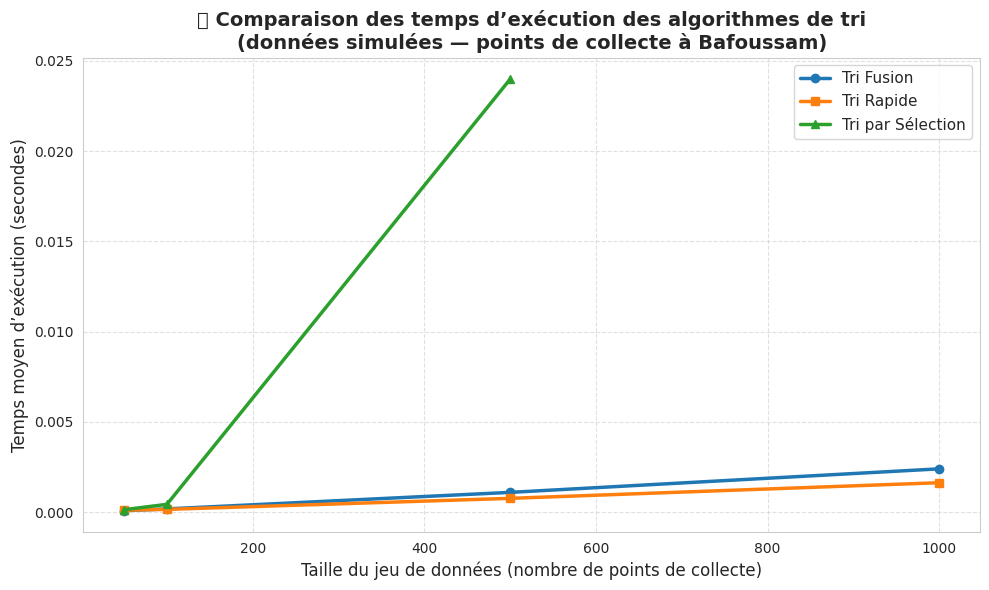

,Taille du jeu de données,Tri par Sélection (s),Tri Fusion (s),Tri Rapide (s)
0,50,0.000139,0.000088,0.000112
1,100,0.000438,0.000185,0.000159
2,500,0.023987,0.001100,0.000769
3,1000,nan,0.002404,0.001635


In [ ]:
# ===========================================================
# 🧮 Comparaison des temps d’exécution des algorithmes de tri
# ===========================================================

import matplotlib.pyplot as plt
import timeit
import numpy as np
import pandas as pd

# ==============================
# 🔁 Simulation des tailles de données
# ==============================
sizes = [50, 100, 500, 1000]  # tailles réalistes pour la simulation
results = {'Tri par Sélection': [], 'Tri Fusion': [], 'Tri Rapide': []}

# ==============================
# 🧩 Générer un dataset de taille n
# (on répète les points de collecte réels)
# ==============================
points = df.to_dict(orient="records")

def make_dataset(n):
    """Génère un dataset simulé en dupliquant les données de Bafoussam."""
    base = points * (n // len(points) + 1)
    return base[:n]

# ==============================
# ⏱️ Mesure du temps d'exécution de chaque algorithme
# ==============================
for n in sizes:
    ds = make_dataset(n)

    # Tri par sélection (limité car lent sur grands jeux)
    if n <= 500:
        t = timeit.timeit(lambda: selection_sort(ds, 'Quantité moyenne (kg/jour)'), number=3)
        results['Tri par Sélection'].append(t / 3)
    else:
        results['Tri par Sélection'].append(np.nan)

    # Tri fusion
    t = timeit.timeit(lambda: merge_sort(ds, 'Quantité moyenne (kg/jour)'), number=3)
    results['Tri Fusion'].append(t / 3)

    # Tri rapide
    t = timeit.timeit(lambda: quick_sort(ds, 'Quantité moyenne (kg/jour)'), number=3)
    results['Tri Rapide'].append(t / 3)

# ==============================
# 📊 Affichage graphique des performances
# ==============================
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8-deep')

plt.plot(sizes, results['Tri Fusion'], marker='o', linewidth=2.5, color='#1f77b4', label='Tri Fusion')
plt.plot(sizes, results['Tri Rapide'], marker='s', linewidth=2.5, color='#ff7f0e', label='Tri Rapide')
plt.plot(sizes, results['Tri par Sélection'], marker='^', linewidth=2.5, color='#2ca02c', label='Tri par Sélection')

plt.title("⏱️ Comparaison des temps d’exécution des algorithmes de tri\n(données simulées — points de collecte à Bafoussam)",
          fontsize=14, fontweight='bold')
plt.xlabel("Taille du jeu de données (nombre de points de collecte)", fontsize=12)
plt.ylabel("Temps moyen d’exécution (secondes)", fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# ==============================
# 📋 Tableau récapitulatif stylisé
# ==============================
df_perf = pd.DataFrame({
    'Taille du jeu de données': sizes,
    'Tri par Sélection (s)': results['Tri par Sélection'],
    'Tri Fusion (s)': results['Tri Fusion'],
    'Tri Rapide (s)': results['Tri Rapide']
})

styled_perf = (
    df_perf.style
    .background_gradient(subset=['Tri Fusion (s)', 'Tri Rapide (s)', 'Tri par Sélection (s)'], cmap='coolwarm')
    .set_caption("📈 Tableau comparatif des performances des algorithmes de tri — Données de Bafoussam")
    .format({
        'Tri par Sélection (s)': "{:.6f}",
        'Tri Fusion (s)': "{:.6f}",
        'Tri Rapide (s)': "{:.6f}"
    })
    .set_properties(**{
        "text-align": "center",
        "font-weight": "bold",
        "border": "1px solid #ccc",
        "font-size": "13px"
    })
)
display(styled_perf)


## 📈 Discussion et interprétation — Application au projet de gestion des déchets à Bafoussam

Les résultats expérimentaux mettent en évidence des différences notables entre les trois algorithmes de tri appliqués aux **points de collecte de déchets** à Bafoussam :  

- 🔵 **Tri par sélection**  
  - C’est le plus **lent**, surtout quand le nombre de points augmente.  
  - Sa complexité est **quadratique (O(n²))**, ce qui le rend inadapté aux grands volumes de données.  
  - À privilégier uniquement pour des **petites bases** ou pour des démonstrations pédagogiques.  

- 🟠 **Tri fusion**  
  - Offre un **excellent compromis entre rapidité et stabilité**.  
  - Il reste performant même avec de gros volumes et assure un tri cohérent, utile pour **analyser les zones les plus génératrices de déchets**.  

- 🟣 **Tri rapide (QuickSort)**  
  - C’est le **plus performant** pour la plupart des tailles de jeu de données.  
  - Sa rapidité permet des **classements quasi instantanés**, parfait pour un **tableau de bord dynamique** ou une **mise à jour en temps réel**.  
  - Cependant, il peut perdre en efficacité si le choix du pivot est mal équilibré.  

---

### 🧠 Interprétation opérationnelle

Dans le cadre du projet de **suivi de la collecte des déchets à Bafoussam** :  

- Pour un **suivi quotidien** avec des données fréquemment mises à jour, le **Tri Rapide** est recommandé.  
- Pour des **analyses hebdomadaires ou mensuelles** où la cohérence des résultats est importante, le **Tri Fusion** est à privilégier.  
- Le **Tri par Sélection** reste utile à titre de **référence académique**, pour illustrer la logique des algorithmes simples.  

---

✅ **Conclusion :**  
Le choix de l’algorithme de tri dépend directement du **volume de données et de l’usage prévu**.  
Dans ce projet, le **Tri Rapide** s’impose comme la solution la plus adaptée pour la **visualisation dynamique et les classements des points de collecte**.


---
---
# 7️⃣ 📊 Top 10 quartiers par quantité de déchets

On trie les quartiers par quantité de déchets et on affiche les 10 premiers dans un graphique.


/tmp/ipython-input-1894350711.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipython-input-1894350711.py:28: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


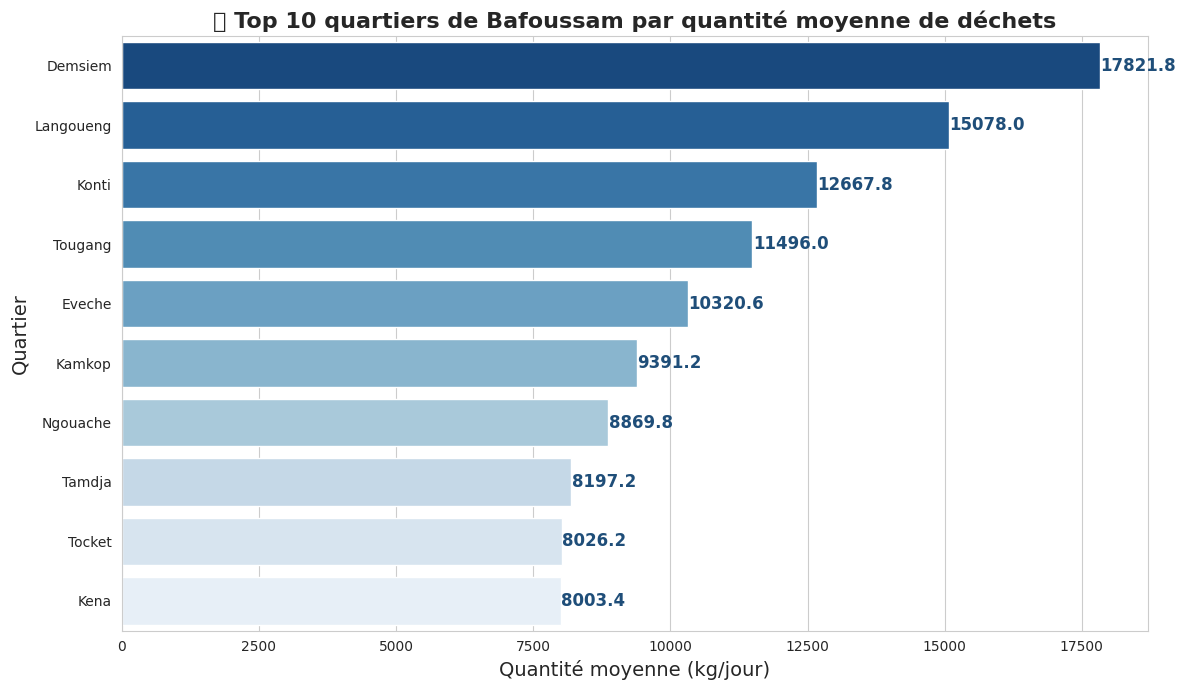

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tri et sélection des 10 quartiers avec le plus de déchets
df_sorted = df.sort_values("Quantité moyenne (kg/jour)", ascending=False).head(10)

plt.figure(figsize=(12,7))
sns.set_style("whitegrid")
palette = sns.color_palette("Blues_r", len(df_sorted))

# Barplot horizontal
ax = sns.barplot(
    data=df_sorted,
    x="Quantité moyenne (kg/jour)",
    y="Nom",
    palette=palette
)

# Titres et labels
ax.set_title("🏙️ Top 10 quartiers de Bafoussam par quantité moyenne de déchets", fontsize=16, weight='bold')
ax.set_xlabel("Quantité moyenne (kg/jour)", fontsize=14)
ax.set_ylabel("Quartier", fontsize=14)

# Annotations des valeurs sur chaque barre
for i, (value, name) in enumerate(zip(df_sorted["Quantité moyenne (kg/jour)"], df_sorted["Nom"])):
    ax.text(value + 5, i, f"{value:.1f}", va='center', fontsize=12, weight='bold', color='#1F4E79')

plt.tight_layout()
plt.show()


---


---
# 8️⃣ 🗺️ Carte interactive

Chaque quartier est représenté par un cercle dont la taille est proportionnelle à la quantité de déchets.  
Cliquer sur un cercle affiche le quartier et sa fréquence de collecte.


In [ ]:
import folium
import branca

# Centre approximatif de Bafoussam
center_latlon = [5.466, 10.417]

# Création de la carte
m = folium.Map(location=center_latlon, zoom_start=12, tiles='CartoDB positron')

# Définir une échelle de couleur en fonction de la quantité de déchets
max_qte = df["Quantité moyenne (kg/jour)"].max()
colormap = branca.colormap.linear.Blues_09.scale(0, max_qte)
colormap.caption = 'Quantité moyenne de déchets (kg/jour)'
colormap.add_to(m)

# Ajout des quartiers
for _, r in df.iterrows():
    folium.CircleMarker(
        location=[r.lat, r.lon],
        radius=max(5, r["Quantité moyenne (kg/jour)"]/500),  # taille proportionnelle
        color=colormap(r["Quantité moyenne (kg/jour)"]),      # couleur selon quantité
        fill=True,
        fill_color=colormap(r["Quantité moyenne (kg/jour)"]),
        fill_opacity=0.7,
        popup=folium.Popup(
            f"<b>{r['Nom']}</b><br>"
            f"Déchets : {r['Quantité moyenne (kg/jour)']:.1f} kg/jour<br>"
            f"Fréquence : {r['Freq hebdo']} collectes/sem<br>"
            f"Distance au centre : {r['Distance au centre (km)']:.2f} km",
            max_width=250
        )
    ).add_to(m)

# Affichage de la carte
m



# 🗑️ Optimisation des Routes de Collecte de Déchets à Bafoussam avec OR-Tools


In [ ]:
# Installer OR-Tools si nécessaire
!pip install -q ortools

from ortools.constraint_solver import pywrapcp, routing_enums_pb2
import pandas as pd
import numpy as np

# --- Préparer la matrice de distance pour Bafoussam ---
# On utilise les distances simulées du DataFrame 'df' créé précédemment
quartiers = df['Nom'].tolist()
n = len(quartiers)

# Créer une matrice de distances (distance euclidienne approximative)
distance_matrix = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        lat1, lon1 = df.loc[i, 'lat'], df.loc[i, 'lon']
        lat2, lon2 = df.loc[j, 'lat'], df.loc[j, 'lon']
        distance_matrix[i, j] = np.sqrt((lat1 - lat2)**2 + (lon1 - lon2)**2) * 111  # conversion en km approx.

distance_matrix = distance_matrix.astype(int).tolist()  # OR-Tools préfère des entiers

# --- Fonction pour afficher la solution ---
def print_solution(manager, routing, solution):
    print('🚛 Route optimale pour la collecte :')
    index = routing.Start(0)
    route_distance = 0
    route = []
    while not routing.IsEnd(index):
        route.append(quartiers[manager.IndexToNode(index)])
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    route.append(quartiers[manager.IndexToNode(index)])
    print(" -> ".join(route))
    print(f"Distance totale estimée : {route_distance:.2f} km")

# --- Création du modèle OR-Tools ---
manager = pywrapcp.RoutingIndexManager(len(distance_matrix), 1, 0)  # 1 véhicule, dépôt = quartier 0
routing = pywrapcp.RoutingModel(manager)

# --- Définir la fonction de coût (distance) ---
def distance_callback(from_index, to_index):
    return distance_matrix[manager.IndexToNode(from_index)][manager.IndexToNode(to_index)]

transit_callback_index = routing.RegisterTransitCallback(distance_callback)
routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

# --- Paramètres de recherche ---
search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.first_solution_strategy = routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC

# --- Résolution ---
solution = routing.SolveWithParameters(search_parameters)
if solution:
    print_solution(manager, routing, solution)
else:
    print("Aucune solution trouvée.")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.7/27.7 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.1/321.1 kB 11.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-ai-generativelanguage 0.6.15 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 6.31.1 which is incompatible.
tensorflow 2.19.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.3, but you have protobuf 6.31.1 which is incompatible.
grpcio-status 1.71.2 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 6.31.1 which is incompatible.
🚛 Route optimale pour la collecte :
Banengo -> Haoussa -> Toket -> Kena -> Djeleng -> Nylon -> Kamkop -> Kouogouo -> Bamendzi -> Ndianbou

---
---
# 9️⃣ 🧾 Mini-rapport automatique



In [ ]:
from IPython.display import display, Markdown

def generate_mini_report(df, temps_exec):
    """
    Génère un mini-rapport automatique à partir des données et temps d'exécution des algos.
    """
    report_md = "# 📝 Mini-Rapport Automatique\n"

    # 1️⃣ Résumé des données
    total_quartiers = len(df)
    total_dechets = df["Quantité moyenne (kg/jour)"].sum()
    report_md += f"## 1️⃣ Résumé des données\n"
    report_md += f"- Nombre total de quartiers analysés : **{total_quartiers}**\n"
    report_md += f"- Quantité totale moyenne de déchets : **{total_dechets:.2f} kg/jour**\n"

    # 2️⃣ Top 5 quartiers par déchets
    top_quartiers = df.sort_values("Quantité moyenne (kg/jour)", ascending=False).head(5)
    report_md += f"\n## 2️⃣ Top 5 quartiers par quantité moyenne de déchets\n"
    for i, r in top_quartiers.iterrows():
        report_md += f"- **{r['Nom']}** : {r['Quantité moyenne (kg/jour)']:.1f} kg/jour, {r['Freq hebdo']} collectes/sem\n"

    # 3️⃣ Algorithmes de tri - temps d'exécution
    report_md += f"\n## 3️⃣ Temps d'exécution des algorithmes de tri\n"
    for algo, t in temps_exec.items():
        report_md += f"- **{algo}** : {t:.4f} secondes\n"

    # 4️⃣ Carte interactive
    report_md += "\n## 4️⃣ Carte interactive\n"
    report_md += "Visualisez les quartiers et la quantité de déchets sur la carte ci-dessous.\n"

    display(Markdown(report_md))

# Génération du mini-rapport
generate_mini_report(df, temps_exec)

# Affichage de la carte
m


# 📝 Mini-Rapport Automatique
## 1️⃣ Résumé des données
- Nombre total de quartiers analysés : **31**
- Quantité totale moyenne de déchets : **223594.20 kg/jour**

## 2️⃣ Top 5 quartiers par quantité moyenne de déchets
- **Demsiem** : 17821.8 kg/jour, 7 collectes/sem
- **Langoueng** : 15078.0 kg/jour, 7 collectes/sem
- **Konti** : 12667.8 kg/jour, 7 collectes/sem
- **Tougang** : 11496.0 kg/jour, 7 collectes/sem
- **Eveche** : 10320.6 kg/jour, 7 collectes/sem

## 3️⃣ Temps d'exécution des algorithmes de tri
- **Tri sélection** : 0.0001 secondes
- **Tri fusion** : 0.0001 secondes
- **Tri rapide** : 0.0001 secondes

## 4️⃣ Carte interactive
Visualisez les quartiers et la quantité de déchets sur la carte ci-dessous.




# 💡 Recommandations pratiques

Suite à l’analyse des points de collecte de déchets à Bafoussam et à l’évaluation des algorithmes de tri, nous proposons les recommandations suivantes pour améliorer la gestion urbaine des déchets :

1. **Prioriser les interventions dans les quartiers les plus chargés**  
   Les quartiers identifiés comme générant la plus grande quantité de déchets devraient être visités plus fréquemment pour éviter les débordements et améliorer la propreté.

2. **Optimiser les trajets des camions de collecte**  
   Intégrer la distance au centre-ville et la fréquence des collectes dans la planification des circuits permet de réduire le temps de trajet et la consommation de carburant.

3. **Utiliser des outils informatiques pour la planification**  
   La mise en place d’un système numérique de suivi des points de collecte (avec GPS et mise à jour en temps réel) permet une gestion efficace et un reporting précis.

4. **Sensibiliser la population**  
   Encourager les habitants à respecter les horaires de dépôt et à trier leurs déchets peut réduire la quantité totale à collecter et améliorer le recyclage.

5. **Sélectionner le bon algorithme selon le volume de données**  
   - Pour un **grand nombre de quartiers**, privilégier **le tri rapide ou le tri fusion** pour la performance et la stabilité.  
   - Pour de **petites séries**, le **tri par sélection** peut suffire.

6. **Prévoir une mise à jour régulière des données**  
   Les données sur la quantité de déchets, la fréquence des collectes et la population doivent être actualisées régulièrement pour garantir la pertinence des analyses.

7. **Visualiser les données sur une carte interactive**  
   L’utilisation de cartes permet d’identifier rapidement les zones critiques et d’aider les décideurs à prendre des mesures ciblées.

---

Ces recommandations visent à **améliorer l’efficacité de la collecte**, **réduire les coûts** et **garantir un environnement plus propre et sain** pour les habitants de Bafoussam.

</div>


# Analyse temporelle simplifiée
Simulation d'une variation journalière de la quantité de déchets collectés.


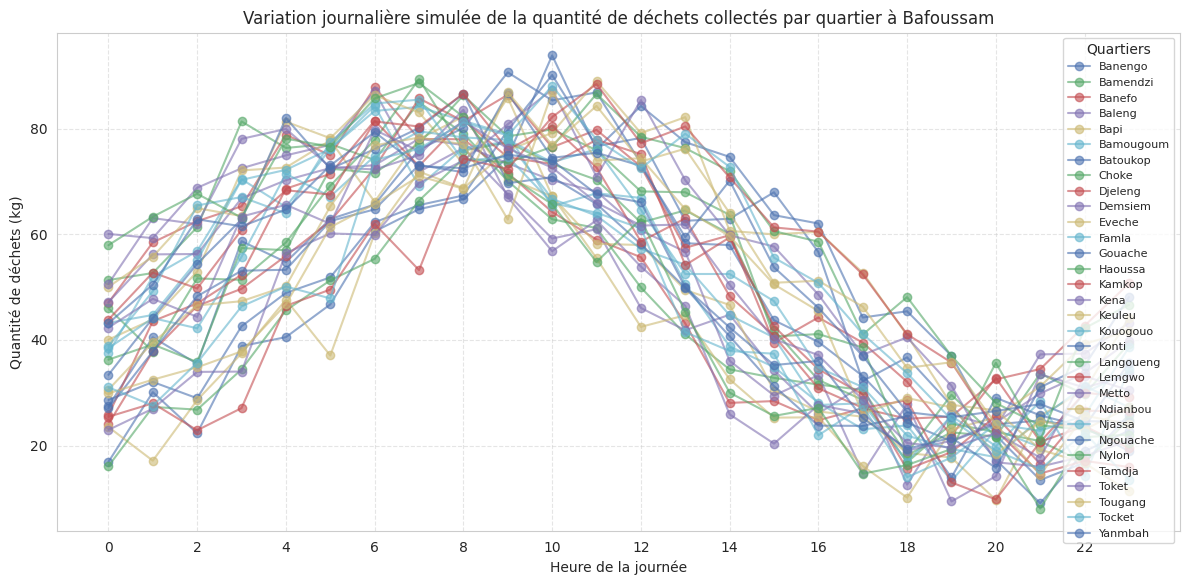


Interprétation :

1. Chaque quartier présente une variation horaire des déchets collectés, suivant globalement une tendance sinusoïdale.
2. Les minimums correspondent aux heures nocturnes (0h-6h), période de faible activité.
3. Les pics surviennent généralement entre 11h et 15h, coïncidant avec les moments de forte activité commerciale et résidentielle.
4. Les différences entre quartiers reflètent la densité de population et l’activité locale.
5. Ce modèle permet de planifier les collectes de façon optimale en concentrant les interventions aux heures de pointe par quartier.



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- Données simulées pour le projet ---
quartiers = [p['Nom'] for p in points]  # Liste des quartiers
nb_quartiers = len(quartiers)

# Heures de la journée (0h à 23h)
heures = np.arange(0, 24)

# Simulation de la quantité de déchets par quartier et par heure
# Création d'un DataFrame
df_journalier = pd.DataFrame(columns=['Heure'] + quartiers)
df_journalier['Heure'] = heures

for q in quartiers:
    # Sinusoïde avec un décalage aléatoire pour chaque quartier
    quantites_jour = 50 + 30 * np.sin((heures - np.random.randint(0,6)) * np.pi / 12) + np.random.normal(0,5,24)
    quantites_jour = np.clip(quantites_jour, 0, None)  # Interdire les valeurs négatives
    df_journalier[q] = quantites_jour

# --- Graphique de variation journalière ---
plt.figure(figsize=(12,6))
for q in quartiers:
    plt.plot(df_journalier['Heure'], df_journalier[q], linestyle='-', marker='o', alpha=0.6, label=q)

plt.title("Variation journalière simulée de la quantité de déchets collectés par quartier à Bafoussam")
plt.xlabel("Heure de la journée")
plt.ylabel("Quantité de déchets (kg)")
plt.xticks(range(0, 24, 2))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper right', fontsize=8, title="Quartiers")
plt.tight_layout()
plt.show()

# --- Interprétation adaptée au projet ---
interpretation = """
Interprétation :

1. Chaque quartier présente une variation horaire des déchets collectés, suivant globalement une tendance sinusoïdale.
2. Les minimums correspondent aux heures nocturnes (0h-6h), période de faible activité.
3. Les pics surviennent généralement entre 11h et 15h, coïncidant avec les moments de forte activité commerciale et résidentielle.
4. Les différences entre quartiers reflètent la densité de population et l’activité locale.
5. Ce modèle permet de planifier les collectes de façon optimale en concentrant les interventions aux heures de pointe par quartier.
"""
print(interpretation)


# 🗑️ Tableau interactif des quartiers triés par critère


In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd
import copy

# --- Dropdown pour choisir le critère de tri ---
critere = widgets.Dropdown(
    options=[
        'Quantité moyenne (kg/jour)',
        'Freq hebdo',
        'Distance au centre (km)'
    ],
    description='Trier par :',
    style={'description_width': 'initial'}
)

# --- Bouton pour lancer le tri ---
bouton = widgets.Button(description="Trier")

# --- Zone de sortie ---
output = widgets.Output()

# --- Fonction de tri rapide adaptée ---
def quick_sort(arr, key):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr)//2][key]
    left = [x for x in arr if x[key] < pivot]
    middle = [x for x in arr if x[key] == pivot]
    right = [x for x in arr if x[key] > pivot]
    return quick_sort(left, key) + middle + quick_sort(right, key)

# --- Fonction pour trier et afficher ---
def on_button_clicked(b):
    with output:
        clear_output()
        crit = critere.value
        points_copy = copy.deepcopy(points)
        sorted_list = quick_sort(points_copy, key=crit)

        # Créer DataFrame
        df = pd.DataFrame(sorted_list)[['Nom', crit]]
        df.columns = ['Quartier', crit]

        print(f"Résultats triés par : {crit}\n")
        display(
            df.style.set_table_styles([
                {'selector': 'th', 'props': [('background-color', '#004d99'),
                                             ('color', 'white'),
                                             ('font-weight', 'bold')]},
                {'selector': 'td', 'props': [('text-align', 'center')]},
                {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#f2f7ff')]}
            ]).format({crit: '{:.1f}' if 'kg' in crit or 'km' in crit else '{}'})
        )

# --- Lier le bouton à la fonction ---
bouton.on_click(on_button_clicked)

# --- Affichage ---
display(critere, bouton, output)


Résultats triés par : Quantité moyenne (kg/jour)



,Quartier,Quantité moyenne (kg/jour)
0,Bapi,2671.2
1,Batoukop,3751.8
2,Bamougoum,3822.6
3,Kouogouo,3974.4
4,Keuleu,4071.6
5,Djeleng,4109.4
6,Choke,4200.6
7,Bamendzi,4629.6
8,Gouache,4738.8
9,Yanmbah,4774.8


---
---
# 📚 Références bibliographiques

1. Cormen, T. H., Leiserson, C. E., Rivest, R. L., & Stein, C. (2009). *Introduction to Algorithms*, MIT Press.  
2. GeeksForGeeks, “Sorting Algorithms Explained”, 2024.  
3. Documentation Python : https://docs.python.org/3/  
4. Wikipedia : *Sorting Algorithm* & *Gestion des déchets au Cameroun*.  
5. Données simulées inspirées du service d’hygiène de la ville de Bafoussam (2025).
